## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Load dataset from file

In [4]:
vehicle =(r'C:\Users\lakshita\Desktop\datasets\vehicle_price_prediction.csv')
df = pd.read_csv(vehicle)

## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [6]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [7]:
df.tail()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive
1001,2024 Chevrolet Silverado 2500 WT,01u 2024 Chevrolet Silverado 2500HD Work Truck...,Chevrolet,Silverado 2500,2024,48995.0,"8 gasoline direct injection, variable valve co...",8.0,Gasoline,31.0,Automatic,WT,Pickup Truck,4.0,Wheatland Yellow,Jet Black,Rear-wheel Drive


## Checking Missing Values

In [9]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

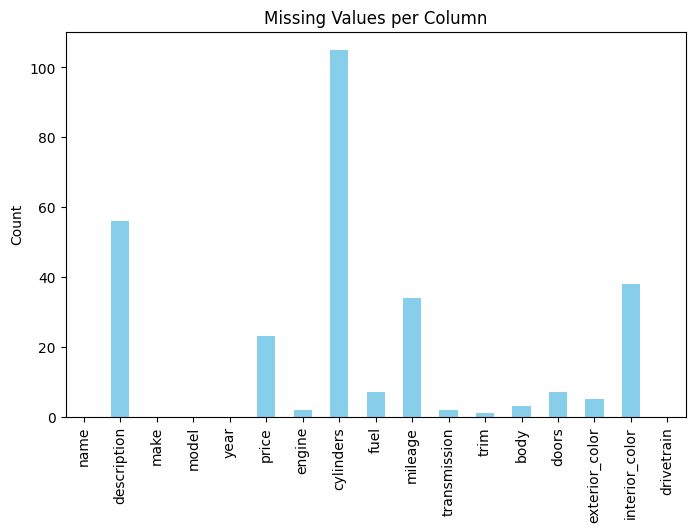

In [10]:
# Visualize missing values using Pandas
plt.figure(figsize=(8, 5))
df.isnull().sum().plot(kind='bar', color='skyblue')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()


In [11]:
df['price'].fillna(df['price'].mean(), inplace=True)

C:\Users\lakshita\AppData\Local\Temp\ipykernel_8904\1085838478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


## Visualization   [Exploratory Data Analysis (EDA)]

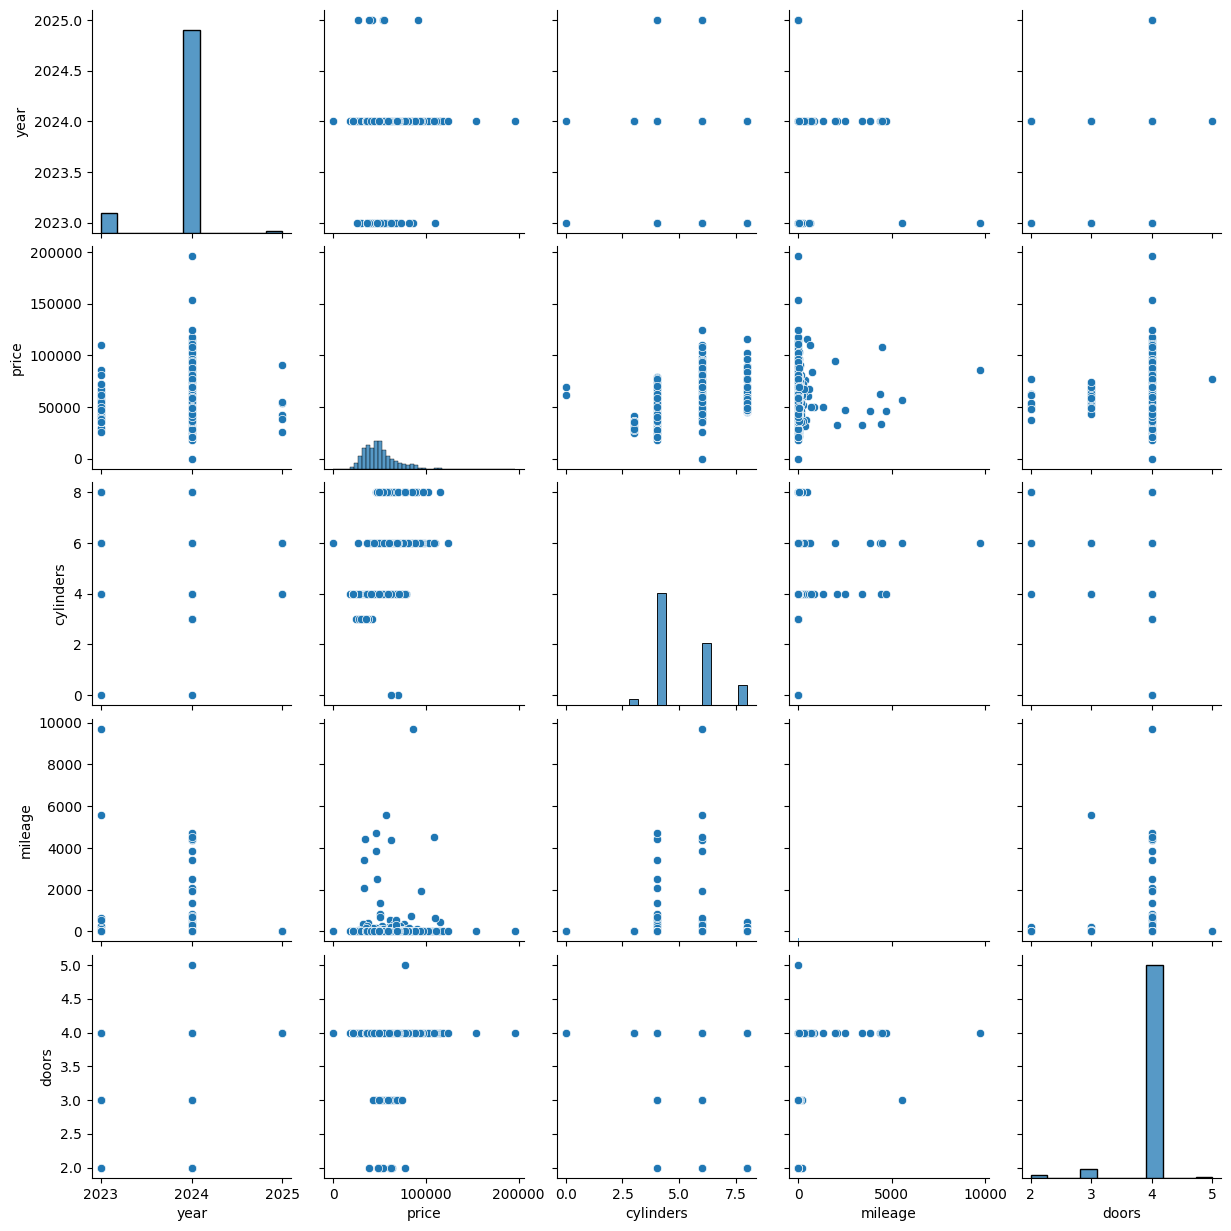

In [13]:
sns.pairplot(df)
plt.show()

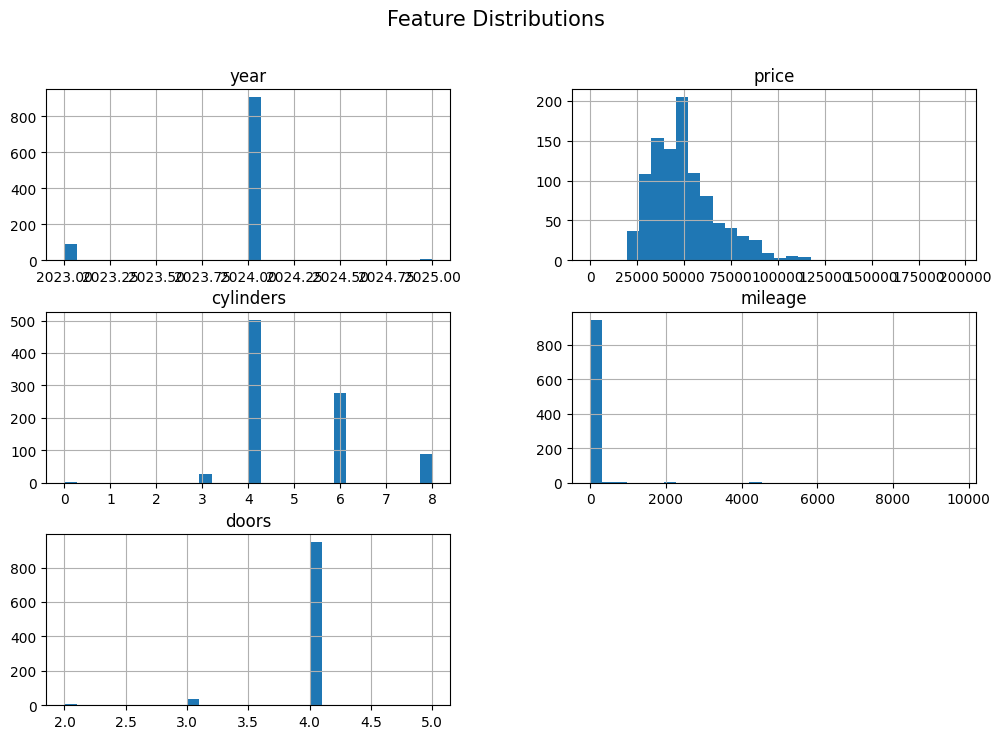

In [14]:
# Visualize distribution of numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

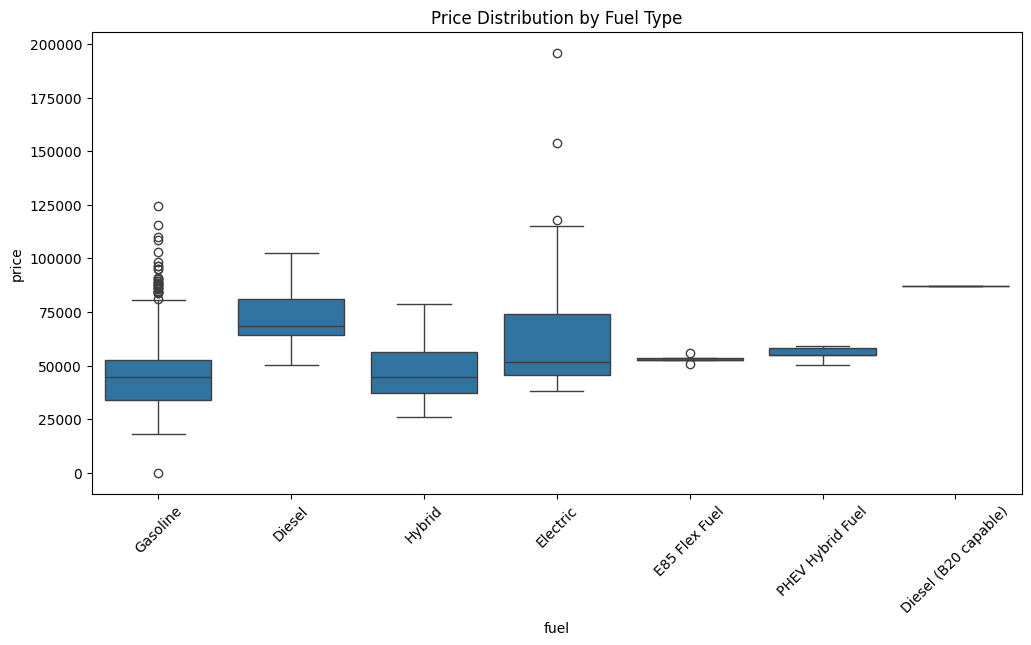

In [15]:
# Boxplot for categorical features vs. price
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fuel'], y=df['price'])
plt.title("Price Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.show()

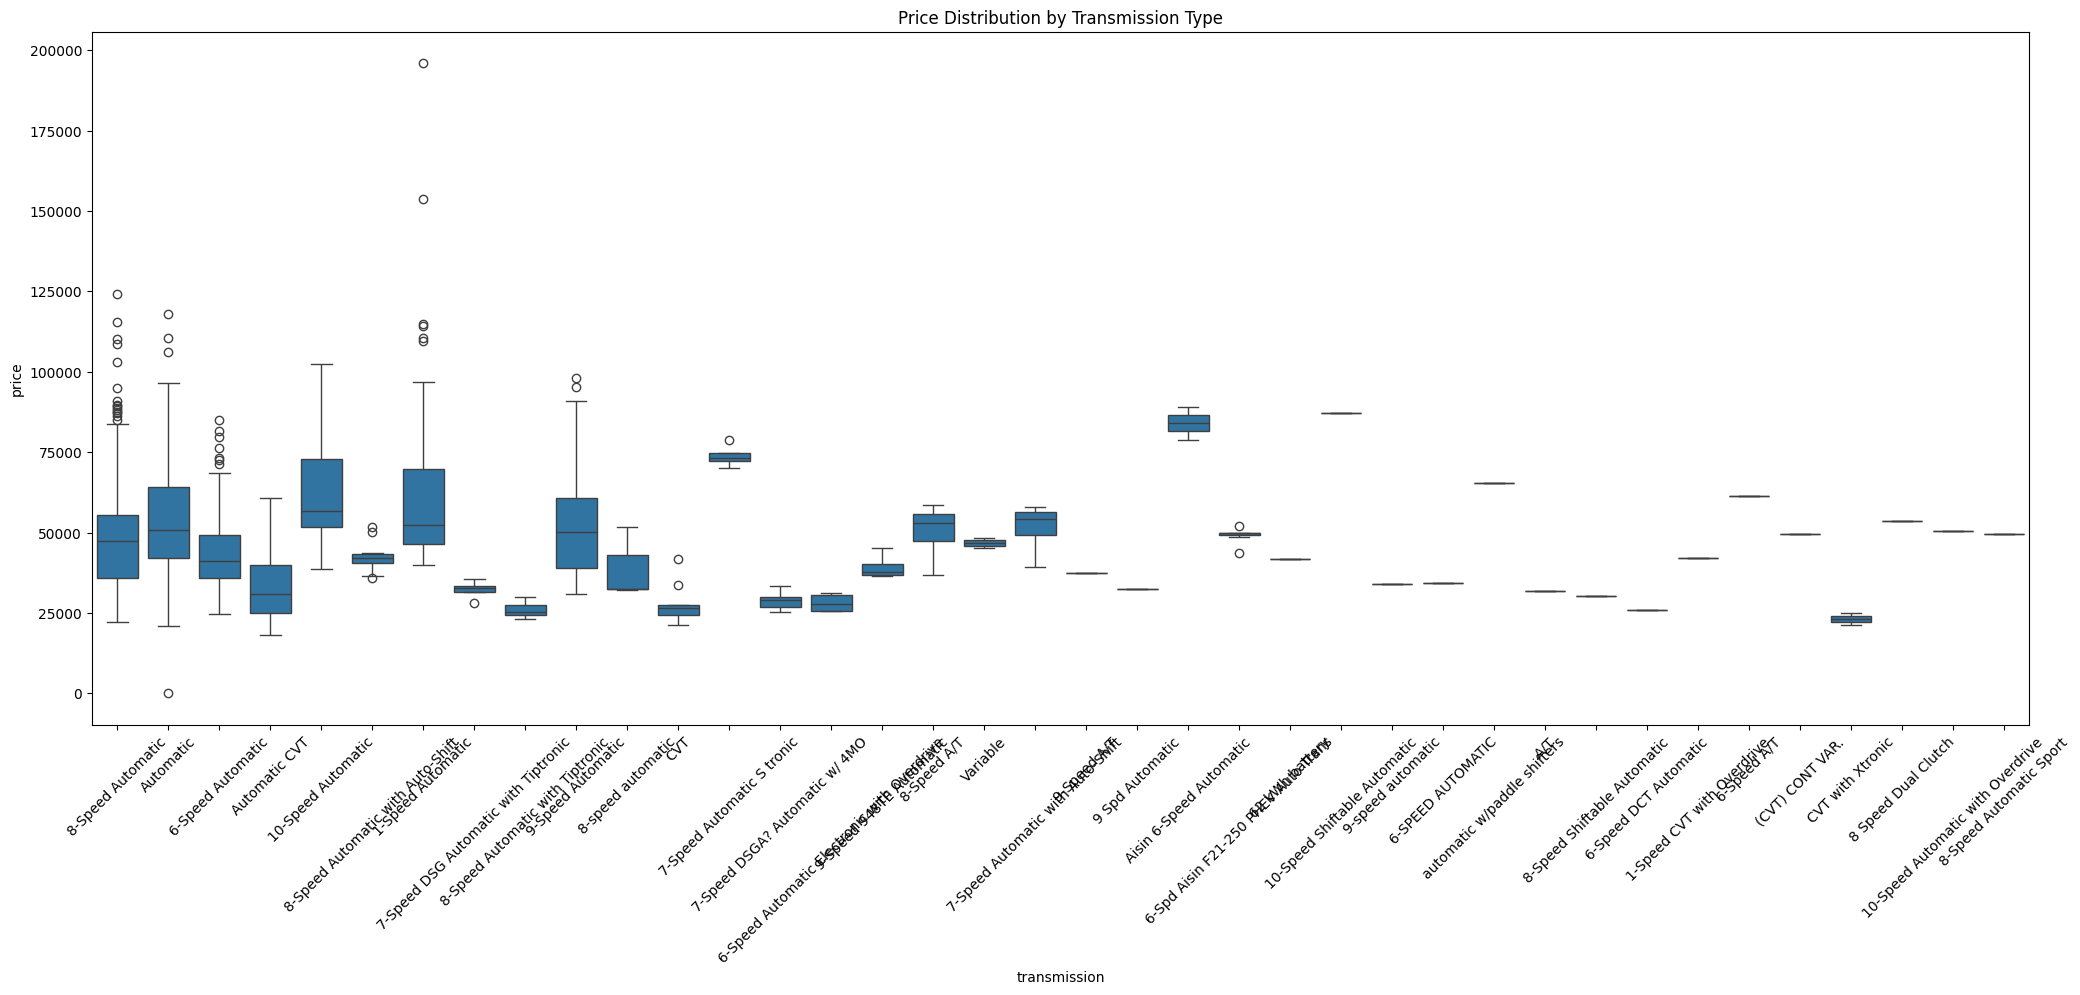

In [16]:
# Price variation based on transmission type
plt.figure(figsize=(25, 9))
sns.boxplot(x=df['transmission'], y=df['price'])
plt.title("Price Distribution by Transmission Type")
plt.xticks(rotation=45)
plt.show()

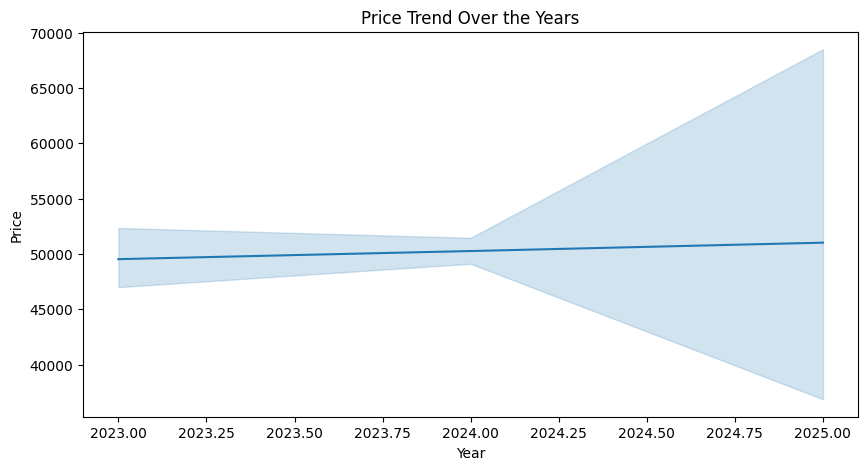

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['year'], y=df['price'])
plt.title("Price Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

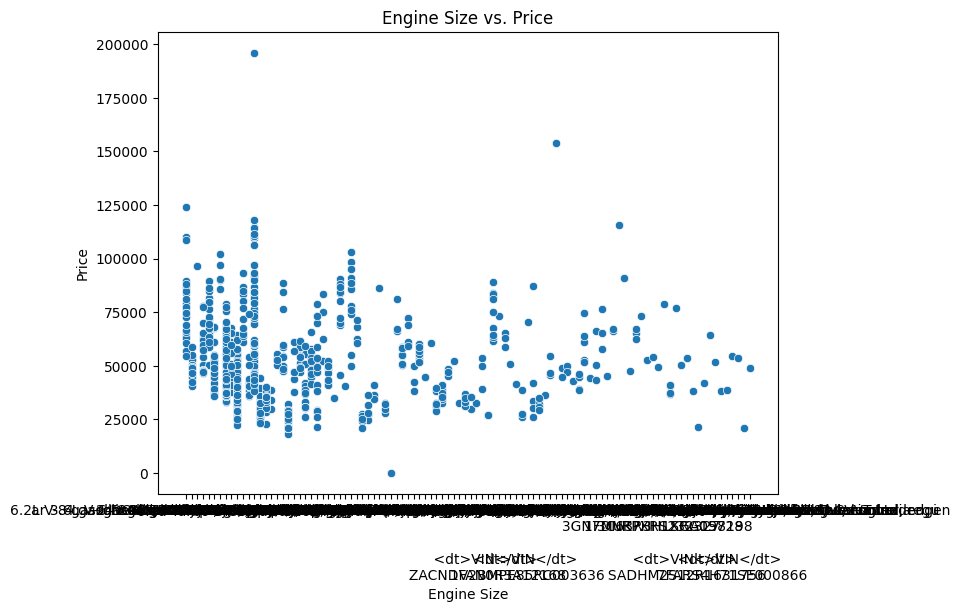

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['engine'], y=df['price'])
plt.title("Engine Size vs. Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

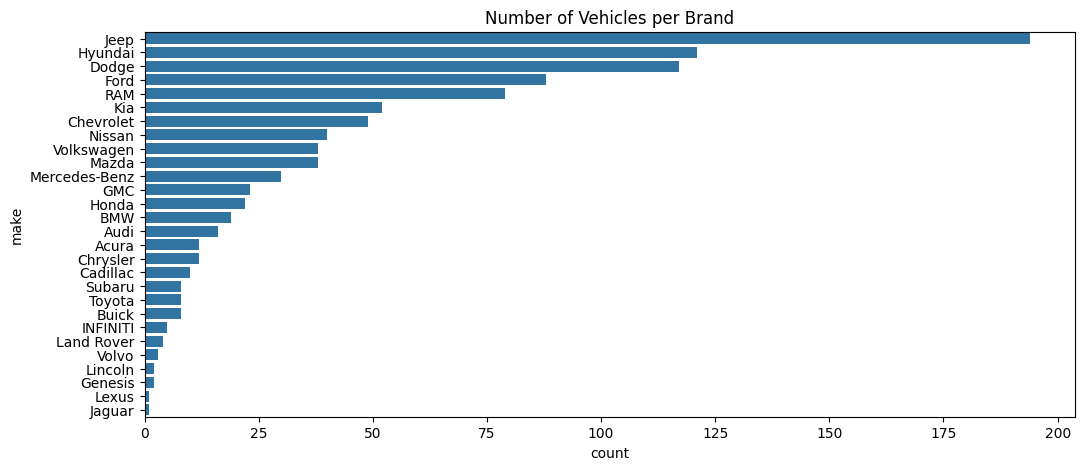

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df['make'], order=df['make'].value_counts().index)
plt.title("Number of Vehicles per Brand")
plt.show()

## Feature Engineering  {Encoding Categorical Features}

In [21]:
# Identify all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize a dictionary to store label encoders
label_encoders = {}

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))  # Convert to string to handle NaNs

# Display first few rows of encoded features
print(df[categorical_cols].head())

   name  description  make  model  engine  fuel  transmission  trim  body  \
0   231          238    15    139      23     4            19   148     6   
1   223          577    15     56      66     4            19    83     6   
2   159          761     9    148      48     4            32    50     6   
3     7          750     7     29      13     4            19   110     6   
4   314           68    23      2      19     0             9    80     5   

   exterior_color  interior_color  drivetrain  
0             257              35           1  
1             144              35           1  
2             236              82           1  
3             259               5           0  
4             207               5           1  


In [22]:
# Select numerical columns
num_cols = ['price', 'mileage', 'year', 'cylinders']

# Initialize and apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head())

      price   mileage      year  cylinders
0  1.320536 -0.116396  0.281354   0.736142
1 -0.001785 -0.134142  0.281354   0.736142
2  2.501046 -0.136113  0.281354   2.173182
3 -0.182299 -0.073019 -3.074795   2.173182
4  1.702835 -0.116396  0.281354   0.736142


## Correlation Heatmap

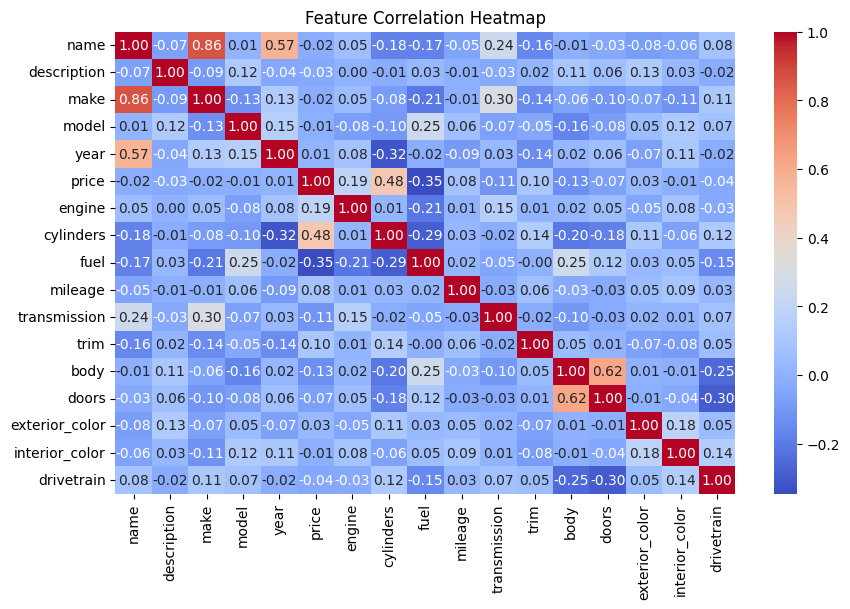

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## ML MOdel Implementation

In [26]:
# Define independent variables (features)
X = df.drop(columns=['price'])  # Drop target column

# Define dependent variable (target)
y = df['price']  # The column we want to predict


In [27]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Scale numerical features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Random Forest Regressor

In [30]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [54]:

# Predict
y_pred = model.predict(X_test)


## Evaluate the Model

In [58]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 0.2218885659197485
Mean Squared Error: 0.16252651646273145
R2 Score: 0.7823960619370904


## Visualize Actual vs Predicted Prices

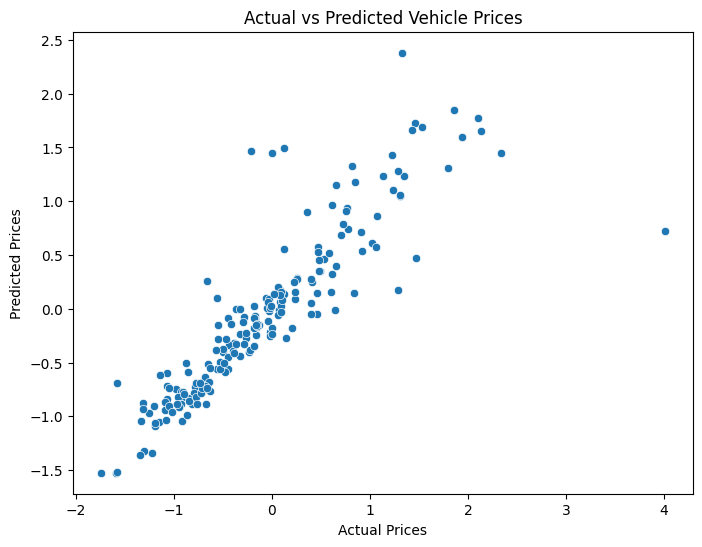

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Vehicle Prices")
plt.show()
